# Avoid Artefacts when drawing contours 

You are trying to draw contours of a shape, but the original picture has some noise, and you can't get a proper contour using the standard technique. 

Here we present a technique of smoothing the picture to remove unwanted artefacts on the mat used for detection.
The smoothing is done by looping many on the picture with a blur, erode, dilate sequence so that hard edges naturally disappears. 

In [1]:
(ns balmy-beach
 (:require
  [opencv4.utils :as u]
  [opencv4.core :refer :all]))

nil

We start by loading the picture of the shape we would like to mark the contours of.  The picture is slightly big for this book so we resize it a bit. 

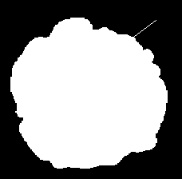

In [2]:
(def img
  (-> 
    "resources/morph/u9phq.png" 
    imread 
    (u/resize-by 0.8)))

(u/>>> img)

Most of the detection algorithms work on 1 channel pictures, so let's convert the picture to gray using **cvt-color!** on a clone of the original picture.

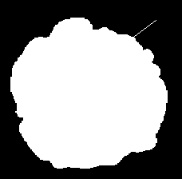

In [3]:
(def gray
  (->
    img
    (clone)
    (cvt-color! COLOR_BGR2GRAY)))

(u/>>> img)

## Naively using find-contours and draw-contours

So we have the work picture ready now, let's naively use **find-contours** and **draw-contours** and see how it goes. 

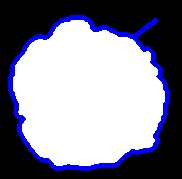

In [4]:
(def contours-1 (new-arraylist))

(find-contours gray contours-1 (new-mat) RETR_CCOMP CHAIN_APPROX_SIMPLE)

(def conv-1 (clone img))
(draw-contours conv-1 contours-1 0 (new-scalar 255 0 0) 3)

(u/>>> conv-1)

Hmm ... there is that weird actefact on the top right of the picture which is pretty annoying, and not really the interesting part of the picture. What should we do ?

## Erode and Dilate to smooth the shape

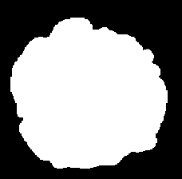

In [5]:
(def k 1)
(def blur-factor 1)
(def mask (new-mat))

(dotimes[ i k]
  (-> gray
    ;(median-blur! blur-factor)
    (erode! mask)
    ;(median-blur! blur-factor)
    (dilate! mask)))

(u/>>> gray)

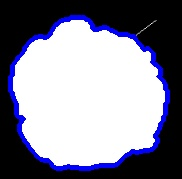

In [6]:
(def contours-2 (new-arraylist))
(find-contours gray contours-2 (new-mat) RETR_CCOMP CHAIN_APPROX_SIMPLE)

(def conv-2 (clone img))
(draw-contours conv-2 contours-2 0 (new-scalar 255 0 0) 3)

(u/>>> conv-2)

## approximate with an ellipse in the bouded box

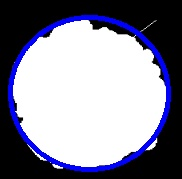

In [7]:
(def boxed
  (clone img))
(def b-box
  (bounding-rect (first contours-2)))
(def center
  (u/middle-of-two-points (.br b-box) (.tl b-box)))
(def r-rect
  (new-rotatedrect center (.size b-box) 1 ))

(ellipse boxed r-rect (new-scalar 255 0 0) 3)

(u/>>> boxed)

## Summary

In [9]:
(annotate img "original")
(annotate conv-1 "naive")
(annotate conv-2 (str "blurred (" k")"))
(annotate boxed "ellipse")

(u/>> (hconcat! [img conv-1 conv-2 boxed]))

CompilerException java.lang.RuntimeException: Unable to resolve symbol: annotate in this context, compiling:(/tmp/form-init1112262329158623409.clj:1:1) 
CompilerException java.lang.RuntimeException: Unable to resolve symbol: annotate in this context, compiling:(/tmp/form-init1112262329158623409.clj:2:1) 
CompilerException java.lang.RuntimeException: Unable to resolve symbol: annotate in this context, compiling:(/tmp/form-init1112262329158623409.clj:3:1) 
CompilerException java.lang.RuntimeException: Unable to resolve symbol: annotate in this context, compiling:(/tmp/form-init1112262329158623409.clj:4:1) 
CompilerException java.lang.RuntimeException: No such var: u/>>, compiling:(/tmp/form-init1112262329158623409.clj:6:1) 


class clojure.lang.Compiler$CompilerException: 